# Description
This script compares cest values of regions within network vs between network.


## Import Packages

In [8]:
import os
import glob
import numpy as np
import pandas as pd
#import network_fcon as fc
import scipy as sp
from scipy.stats import pearsonr
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.formula.api as smf
from netneurotools import datasets, plotting

### Set Variables and Paths

In [10]:
# Set Variables
dataset = 'longglucest_outputmeasures2'
#atlas = 'Schaefer2018_1000Parcels_17Networks'
atlas = 'atl-Cammoun2012_res-500'
inpath = "/Users/pecsok/Desktop/ImageData/PMACS_remote/data/nmaps/analyses/" + atlas
nmaps = ["NMDA", "mGluR5", "GABA"]

# Import Data
#means_df = pd.read_csv(inpath + '/means_std_' + dataset + '_' + atlas + '.csv')


means_df = pd.read_csv(inpath + '/means_subjectnmaps_' + dataset + '_' + atlas + '.csv')


### NMAP correlations

In [15]:
if atlas == 'atl-Cammoun2012_res-500':
    # List of subcortical parcels
    subcortical = ['accumbensarea NZMean', 'brainstem NZMean', 'thalamusproper NZMean']  # Replace with actual subcortical parcel names
    means_df_sub = means_df[means_df['Parcel'].isin(subcortical)]
    means_df_cort = means_df[~means_df['Parcel'].isin(subcortical)]  # Use ~ for negation
means_df = means_df_cort 

                               Parcel hstatus  CEST_avg      NMDA    mGluR5  \
4    caudalanteriorcingulate_5 NZMean      HC  0.158525 -1.047351  0.278927   
5    caudalanteriorcingulate_5 NZMean     PSY  0.007280 -1.210817  0.019354   
6                     cuneus_3 NZMean      HC  0.909995  0.750100  1.195524   
7                     cuneus_3 NZMean     PSY  0.313057  0.808305  1.227833   
8                   cuneus_5 NZMean.1      HC  1.445215  0.029143  0.314619   
..                                ...     ...       ...       ...       ...   
103          superiorfrontal_7 NZMean     PSY -0.446920  0.716904  1.076864   
104          superiorfrontal_8 NZMean      HC -0.850534  0.380748  0.482610   
105          superiorfrontal_8 NZMean     PSY -0.792765  0.242487  0.391164   
106          superiorfrontal_9 NZMean      HC -0.145166 -0.110998  0.021254   
107          superiorfrontal_9 NZMean     PSY -0.360681 -0.306964 -0.112934   

         GABA  
4   -0.089857  
5   -0.331406  
6  

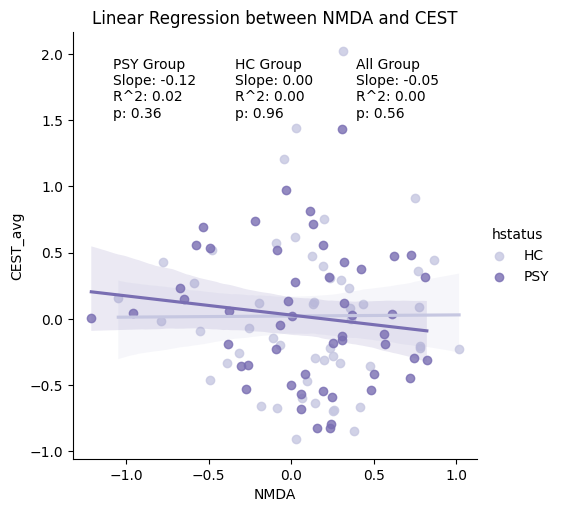

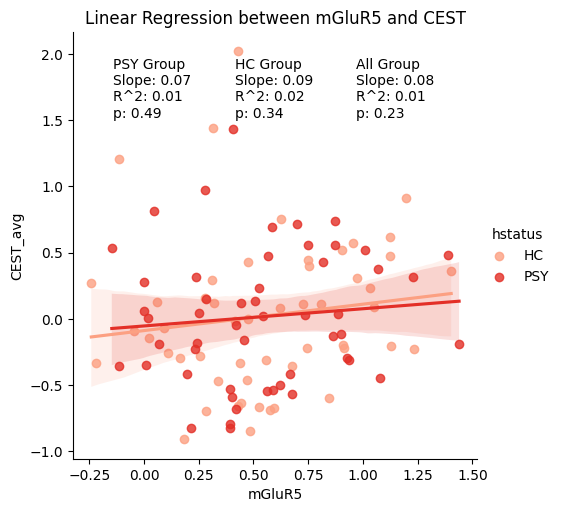

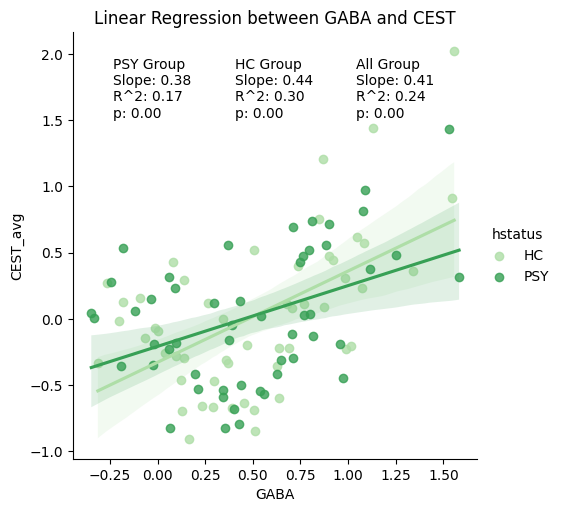

In [16]:
print(means_df)
nmap_palette = {
    "NMDA": "Purples",   # Replace with actual nmap names and desired palettes
    "mGluR5": "Reds",
    "GABA": "Greens",
    "D2": "Oranges"
    # Add more mappings as needed
}

for nmap in nmaps:
    #means_df[nmap] = pd.to_numeric(means_df[nmap], errors='coerce')
    #means_df['CEST_avg'] = pd.to_numeric(means_df['CEST_avg'], errors='coerce')
    graph_df = means_df  #.dropna(subset=[nmap, 'CEST_avg'])
    palette = nmap_palette.get(nmap) # Default to "Set1" if nmap not in dictionary
    plot = sns.lmplot(x=nmap, y='CEST_avg', hue='hstatus', data=graph_df, palette=palette)
    plt.xlabel(nmap)
    plt.ylabel("CEST_avg")
    plt.title('Linear Regression between ' + nmap + ' and CEST')
    
    slope, intercept, r_value, p_value, std_err = linregress(graph_df.loc[graph_df['hstatus'] == 'PSY', 'CEST_avg'], graph_df.loc[graph_df['hstatus'] == 'PSY', nmap])
    plt.text(0.1, 0.8, f'PSY Group\nSlope: {slope:.2f}\nR^2: {r_value**2:.2f}\np: {p_value:.2f}', transform=plt.gca().transAxes)
    slope, intercept, r_value, p_value, std_err = linregress(graph_df.loc[graph_df['hstatus'] == 'HC', 'CEST_avg'], graph_df.loc[graph_df['hstatus'] == 'HC', nmap])
    plt.text(0.4, 0.8, f'HC Group\nSlope: {slope:.2f}\nR^2: {r_value**2:.2f}\np: {p_value:.2f}', transform=plt.gca().transAxes)
    slope, intercept, r_value, p_value, std_err = linregress(graph_df['CEST_avg'], graph_df[nmap])
    plt.text(0.7, 0.8, f'All Group\nSlope: {slope:.2f}\nR^2: {r_value**2:.2f}\np: {p_value:.2f}', transform=plt.gca().transAxes)

    plt.show() 


In [ ]:
# Now try to generate some null models.

In [45]:
schaefer_nifti = nib.load('/Users/pecsok/projects/Neuromaps/pecsok_pfns/neuromaps/data/test_masks/Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_1mm.nii.gz')
schaefer_data = schaefer_nifti.get_fdata()

# CEST DATA
datapath = '/Users/pecsok/projects/Neuromaps/hansen_receptors/'
figpath = '/Users/pecsok/projects/GluCEST-fMRI/glucest-rsfmri/fmri_pipeline/parcellated_pipeline/figures'
cestavg_df = pd.DataFrame(index=range(1, 1001), columns=['CESTavg'])
cestavg_df['CESTavg'] = np.nan  # Initialize all values to 0
for _, row in cestdf.iterrows():
    # Extract parcel ID number using regex
    match = re.search(r'(\d+)', row['parcel'])
    if match:
        parcel_id = int(match.group(1))
        # Add CESTavg data to corresponding row in the new DataFrame
        if 1 <= parcel_id <= 1000:  # Ensure the parcel ID is within range
            cestavg_df.at[parcel_id, 'CESTavg'] = row['CESTavg']
            
for i, row in cestavg_df.iterrows():
    parcel_id = i
    value = row['CESTavg']
print(cestavg_df)

    
parcel_values = pd.DataFrame({
    'parcel_id': range(1, 1001),  # Parcel IDs should range from 1 to 1000
    'value': cestavg_df['CESTavg'] # np.random.rand(1000)  # Replace with your actual values
})
print(parcel_values)


# Create a copy of the Schaefer atlas array to modify
new_schaefer_data = np.zeros(schaefer_data.shape)

# Loop through each parcel and assign the corresponding value from your DataFrame
for i, row in parcel_values.iterrows():
    parcel_id = row['parcel_id']
    value = row['value']
    
    # Assign the value to all voxels belonging to the current parcel ID
    new_schaefer_data[schaefer_data == parcel_id] = value

# Create a new NIfTI image with the updated data
new_nifti = nib.Nifti1Image(new_schaefer_data, affine=schaefer_nifti.affine, header=schaefer_nifti.header)

# Save the new NIfTI file
new_nifti.to_filename('updated_schaefer_atlas.nii.gz')

      CESTavg
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
...       ...
996       NaN
997       NaN
998       NaN
999       NaN
1000      NaN

[1000 rows x 1 columns]
      parcel_id  value
1             1    NaN
2             2    NaN
3             3    NaN
4             4    NaN
5             5    NaN
...         ...    ...
996         996    NaN
997         997    NaN
998         998    NaN
999         999    NaN
1000       1000    NaN

[1000 rows x 2 columns]
